<a href="https://colab.research.google.com/github/Kautkar-Ashish/Kautkar-Ashish/blob/main/Market_Segmentation_EV_in_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ev_sales_by_makers_and_cat_15-24.csv to ev_sales_by_makers_and_cat_15-24.csv


In [3]:
df1 = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
df1.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [4]:
from google.colab import files
uploaded = files.upload()

Saving EV Maker by Place.csv to EV Maker by Place.csv


In [5]:
df2 = pd.read_csv('EV Maker by Place.csv')
df2.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [6]:
from google.colab import files
uploaded = files.upload()

Saving OperationalPC.csv to OperationalPC.csv


In [7]:
df3 = pd.read_csv('OperationalPC.csv')
df3.head()

,State,No. of Operational PCS
0,Andaman & Nicobar,3
1,Andhra Pradesh,327
2,Arunachal Pradesh,9
3,Assam,86
4,Bihar,124


In [8]:
from google.colab import files
uploaded = files.upload()

Saving Vehicle Class - All.csv to Vehicle Class - All.csv


In [10]:
df4 = pd.read_csv('Vehicle Class - All.csv')
df4.head()

,Vehicle Class,Total Registration
0,FOUR WHEELER (INVALID CARRIAGE),"21,346"
1,HEAVY GOODS VEHICLE,"58,70,865"
2,HEAVY MOTOR VEHICLE,"1,02,965"
3,HEAVY PASSENGER VEHICLE,"8,28,189"
4,LIGHT GOODS VEHICLE,"1,02,49,591"


In [12]:
from google.colab import files
uploaded = files.upload()

Saving ev_cat_01-24.csv to ev_cat_01-24.csv


In [14]:
df5 = pd.read_csv('ev_cat_01-24.csv')
df5.head()

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0


# **Exploratory Data Analysis (EDA)**

In [15]:
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)
print('DF4 Shape: ', df4.shape)
print('DF5 Shape: ', df5.shape)

DF1 Shape:  (1386, 12)
DF2 Shape:  (62, 3)
DF3 Shape:  (34, 2)
DF4 Shape:  (16, 2)
DF5 Shape:  (284, 17)


In [16]:
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())
print(' <<< DATASET 3 -----------------------------------------------------------')
print(df3.info())
print(' <<< DATASET 4 -----------------------------------------------------------')
print(df4.info())
print(' <<< DATASET 5 -----------------------------------------------------------')
print(df5.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int64 
 4   2017    1386 non-null   int64 
 5   2018    1386 non-null   int64 
 6   2019    1386 non-null   int64 
 7   2020    1386 non-null   int64 
 8   2021    1386 non-null   int64 
 9   2022    1386 non-null   int64 
 10  2023    1386 non-null   int64 
 11  2024    1386 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.1+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0 

In [17]:
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
d4 = df4.describe()
d5 = df5.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2, '<<< DATASET 3 >>>', d3, '<<< DATASET 4 >>>', d4, '<<< DATASET 5 >>>', d5)

'<<< DATASET 1 >>>'

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,5.593074,35.533189,62.784271,93.624098,119.614719,89.300144,237.268398,736.315296,1103.343434,706.308081
std,62.430741,400.757230,496.932817,511.486338,692.529043,504.744348,1793.878376,5917.016908,9631.219039,7022.251339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,3.000000,6.000000,10.000000,7.000000,13.000000,39.000000,96.000000,79.000000
max,1708.000000,13401.000000,15094.000000,10816.000000,13213.000000,9543.000000,46260.000000,109398.000000,267355.000000,211273.000000


'<<< DATASET 2 >>>'

,EV Maker,Place,State
count,62,62,62
unique,61,36,13
top,Lohia Auto Industries,Pune,Maharashtra
freq,2,7,15


'<<< DATASET 3 >>>'

,No. of Operational PCS
count,34.000000
mean,357.235294
std,617.579099
min,1.000000
25%,18.750000
50%,129.500000
75%,451.250000
max,3079.000000


'<<< DATASET 4 >>>'

,Vehicle Class,Total Registration
count,16,16
unique,16,16
top,FOUR WHEELER (INVALID CARRIAGE),"21,346"
freq,1,1


'<<< DATASET 5 >>>'

,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,0.341549,2.161972,0.514085,28.630282,44.806338,634.964789,80.306338,0.109155,2.732394,0.172535,26.721831,5.274648,0.443662,6805.221831,8129.883803,47.390845
std,1.223835,12.048276,1.024339,78.967099,132.064637,1671.032572,237.610605,0.410189,10.343169,1.233436,67.552702,11.173634,2.069549,13702.076927,21513.610306,129.932731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000,96.750000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.000000,48.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,201.000000,0.000000
75%,0.000000,1.000000,1.000000,1.250000,28.250000,86.250000,24.000000,0.000000,0.000000,0.000000,18.250000,3.000000,0.000000,7582.750000,1411.250000,1.000000
max,10.000000,183.000000,6.000000,543.000000,1645.000000,7609.000000,1787.000000,4.000000,86.000000,20.000000,673.000000,70.000000,24.000000,60618.000000,137113.000000,863.000000


<ipython-input-24-087601099a29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3_sorted, y='State', x='No. of Operational PCS', palette='plasma')


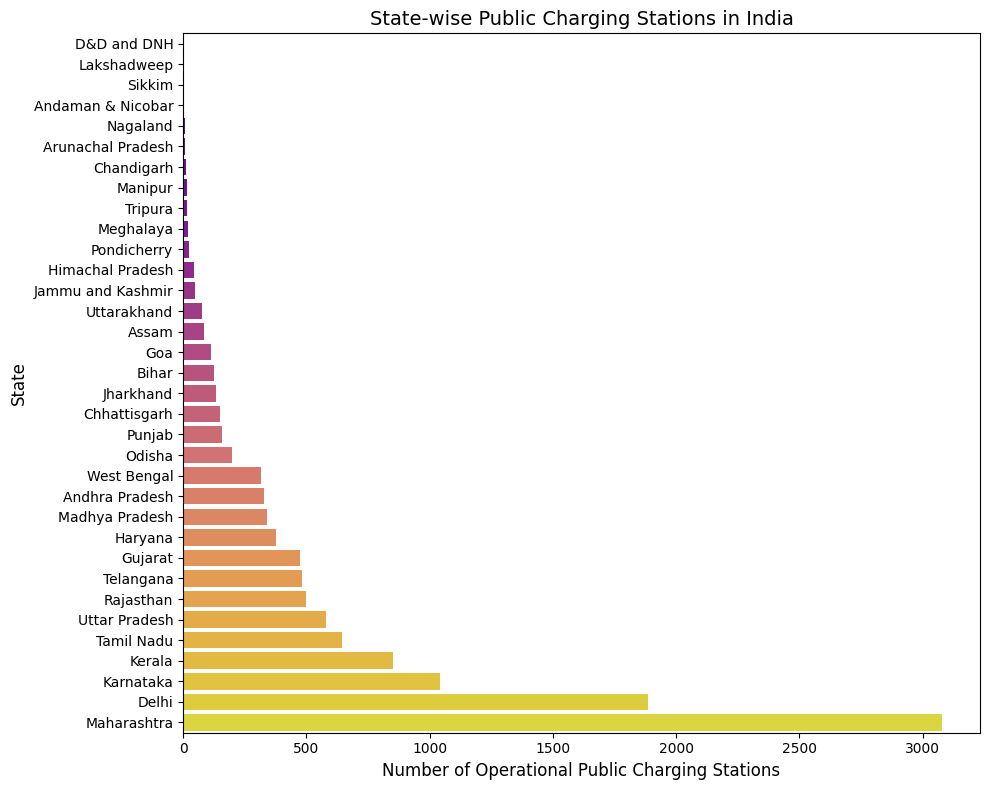

In [24]:
# Sort data by number of operational PCS
df3_sorted = df3.sort_values('No. of Operational PCS', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=df3_sorted, y='State', x='No. of Operational PCS', palette='plasma')
plt.xlabel('Number of Operational Public Charging Stations', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('State-wise Public Charging Stations in India', fontsize=14)
plt.tight_layout()
plt.show()

In [25]:
print(df4.columns.tolist())
print(df4.head())

['Vehicle Class', 'Total Registration']
                     Vehicle Class Total Registration
0  FOUR WHEELER (INVALID CARRIAGE)             21,346
1              HEAVY GOODS VEHICLE          58,70,865
2              HEAVY MOTOR VEHICLE           1,02,965
3          HEAVY PASSENGER VEHICLE           8,28,189
4              LIGHT GOODS VEHICLE        1,02,49,591


<ipython-input-26-d87a187e0b15>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4_sorted, y='Vehicle Class', x='Total Registration', palette='plasma')


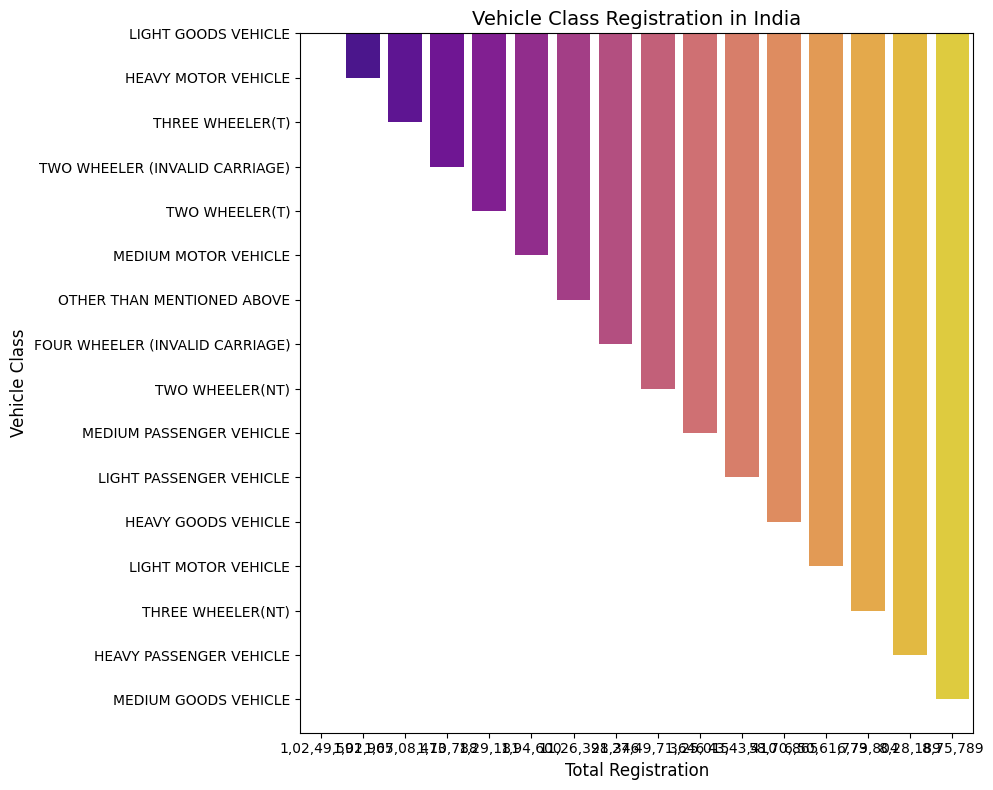

In [26]:
# Clean column names (remove any leading/trailing spaces)
df4.columns = df4.columns.str.strip()

# Sort data by a relevant column, assuming 'Total Registration' is the one to sort by
df4_sorted = df4.sort_values('Total Registration', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=df4_sorted, y='Vehicle Class', x='Total Registration', palette='plasma')
plt.xlabel('Total Registration', fontsize=12)
plt.ylabel('Vehicle Class', fontsize=12)
plt.title('Vehicle Class Registration in India', fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-28-8fd15928cc1a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df3, x='State', kind='count', palette='viridis', height=6, aspect=2)


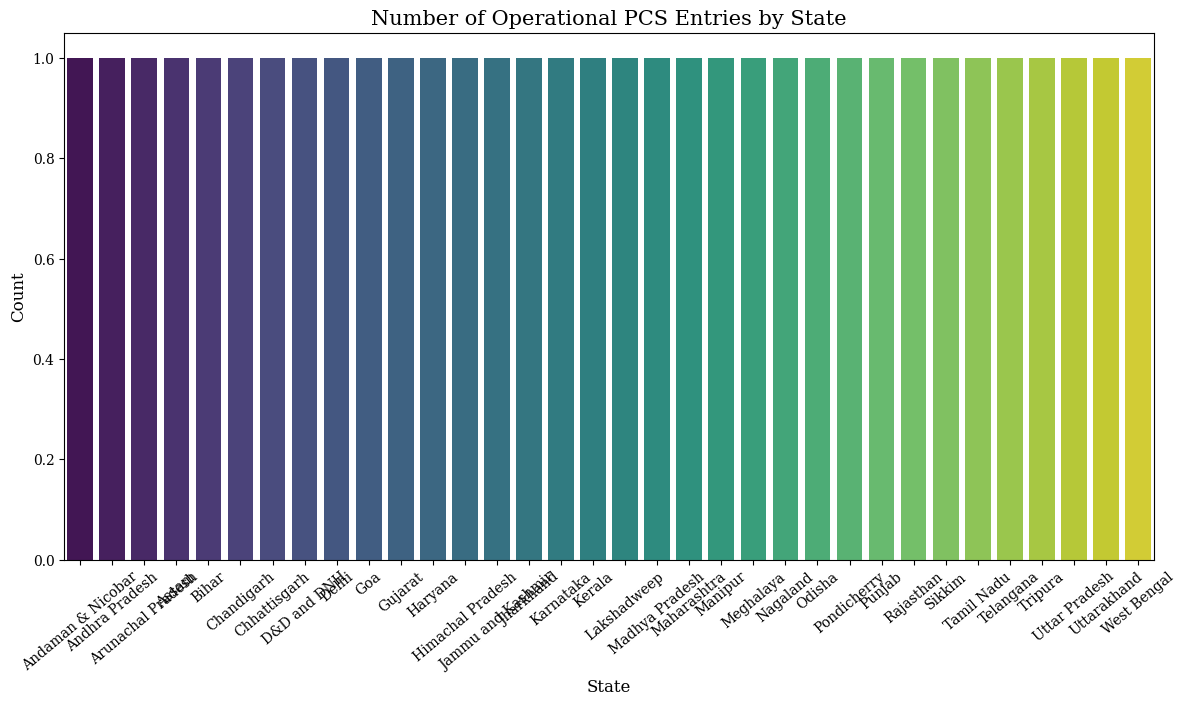

In [28]:
sns.catplot(data=df3, x='State', kind='count', palette='viridis', height=6, aspect=2)

# Customize plot aesthetics
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('State', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.title('Number of Operational PCS Entries by State', family='serif', size=15)

# Show plot
plt.show()

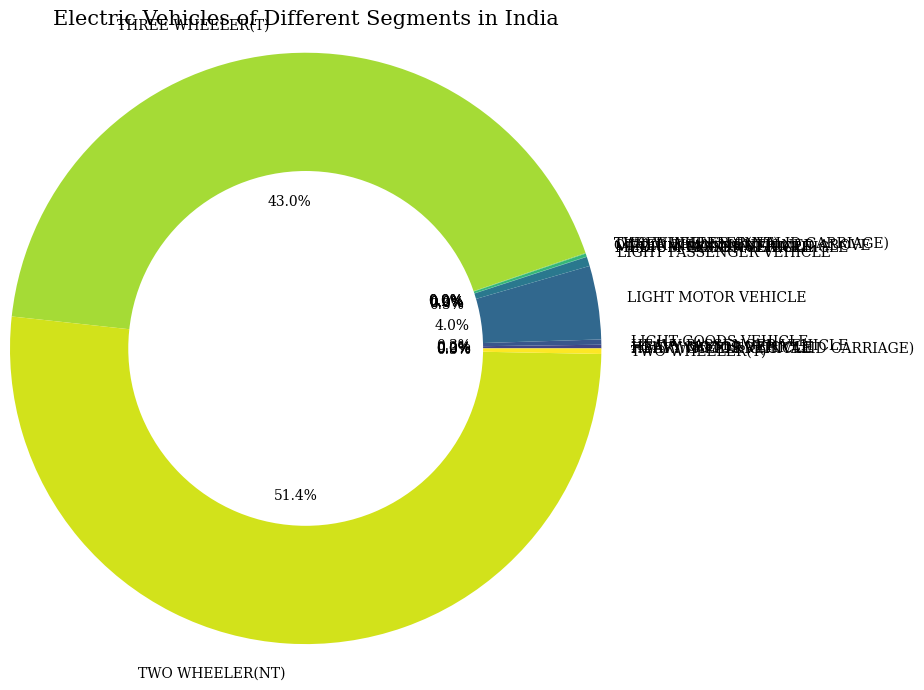

In [35]:
import matplotlib.pyplot as plt

vehicle_totals = df5.drop(columns=['Date']).sum()

x = vehicle_totals.plot.pie(
    radius=2,
    cmap='viridis',
    startangle=0,
    textprops=dict(family='serif'),
    pctdistance=0.5,
    autopct='%1.1f%%'
)

plt.pie(x=[1], radius=1.2, colors=['white'])

plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

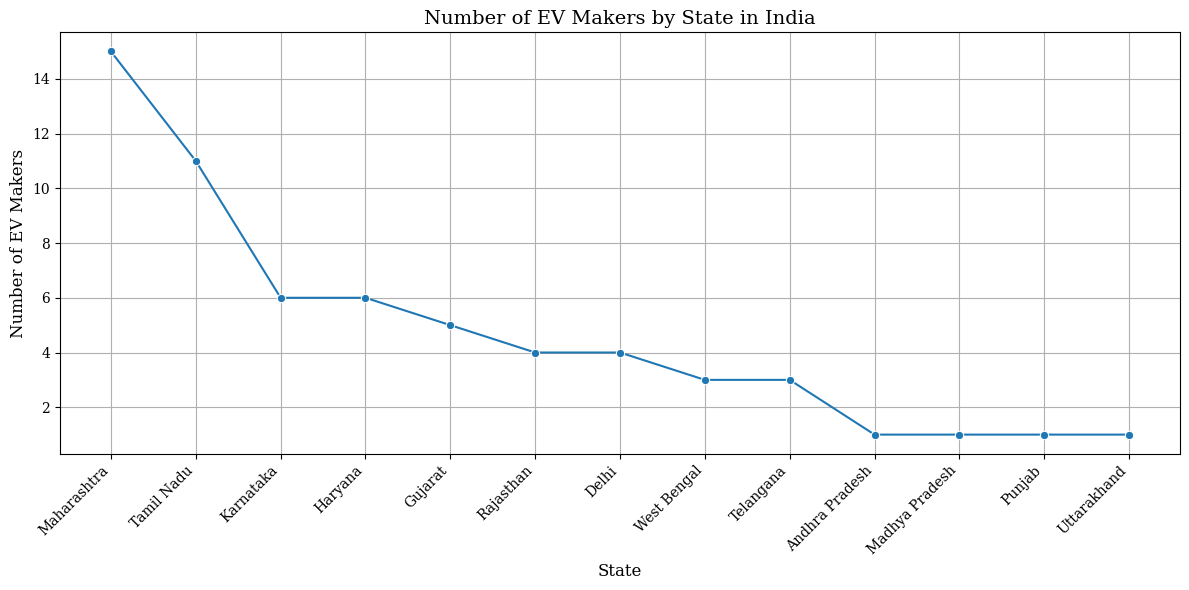

In [37]:
ev_count_by_state = df2.groupby('State')['EV Maker'].nunique().reset_index()
ev_count_by_state = ev_count_by_state.sort_values('EV Maker', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(data=ev_count_by_state, x='State', y='EV Maker', marker='o', sort=False)
plt.xticks(rotation=45, ha='right', fontsize=10, family='serif')
plt.yticks(fontsize=10, family='serif')
plt.xlabel('State', fontsize=12, family='serif')
plt.ylabel('Number of EV Makers', fontsize=12, family='serif')
plt.title('Number of EV Makers by State in India', fontsize=14, family='serif')
plt.tight_layout()
plt.grid(True)
plt.show()

<ipython-input-38-1384b77f9c16>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df5['Date'] = pd.to_datetime(df5['Date'], errors='coerce')


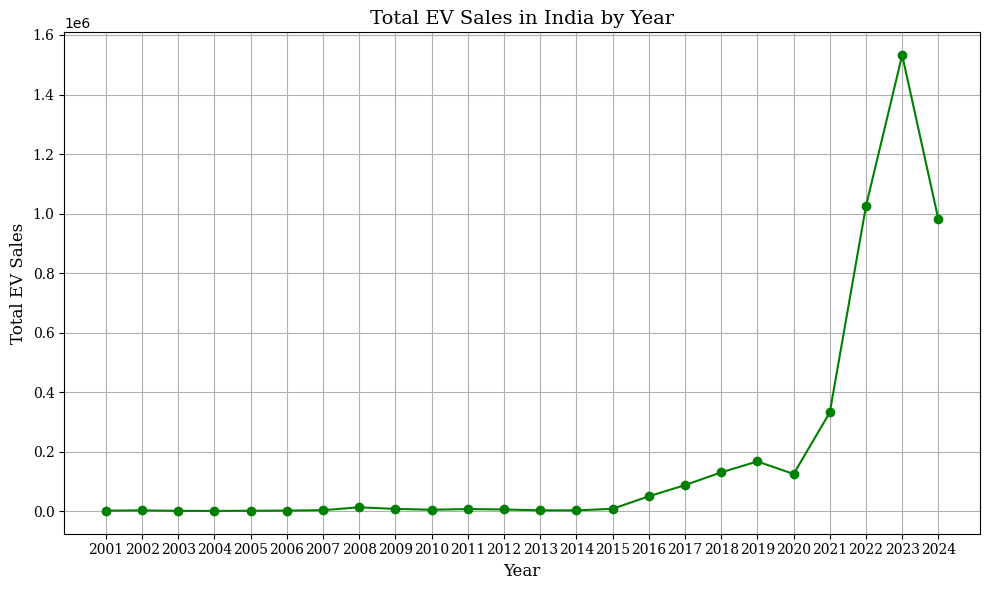

In [38]:
df5['Date'] = pd.to_datetime(df5['Date'], errors='coerce')

# Extract year from the Date
df5['Year'] = df5['Date'].dt.year

# Drop non-numeric and date-related columns to aggregate total sales
ev_sales_by_year = df5.drop(columns=['Date']).groupby('Year').sum()

# Sum all vehicle categories to get total EV sales per year
ev_sales_by_year['Total EV Sales'] = ev_sales_by_year.sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ev_sales_by_year.index, ev_sales_by_year['Total EV Sales'], marker='o', linestyle='-', color='green')
plt.title('Total EV Sales in India by Year', fontsize=14, family='serif')
plt.xlabel('Year', fontsize=12, family='serif')
plt.ylabel('Total EV Sales', fontsize=12, family='serif')
plt.xticks(ev_sales_by_year.index, fontsize=10, family='serif')
plt.yticks(fontsize=10, family='serif')
plt.grid(True)
plt.tight_layout()
plt.show()

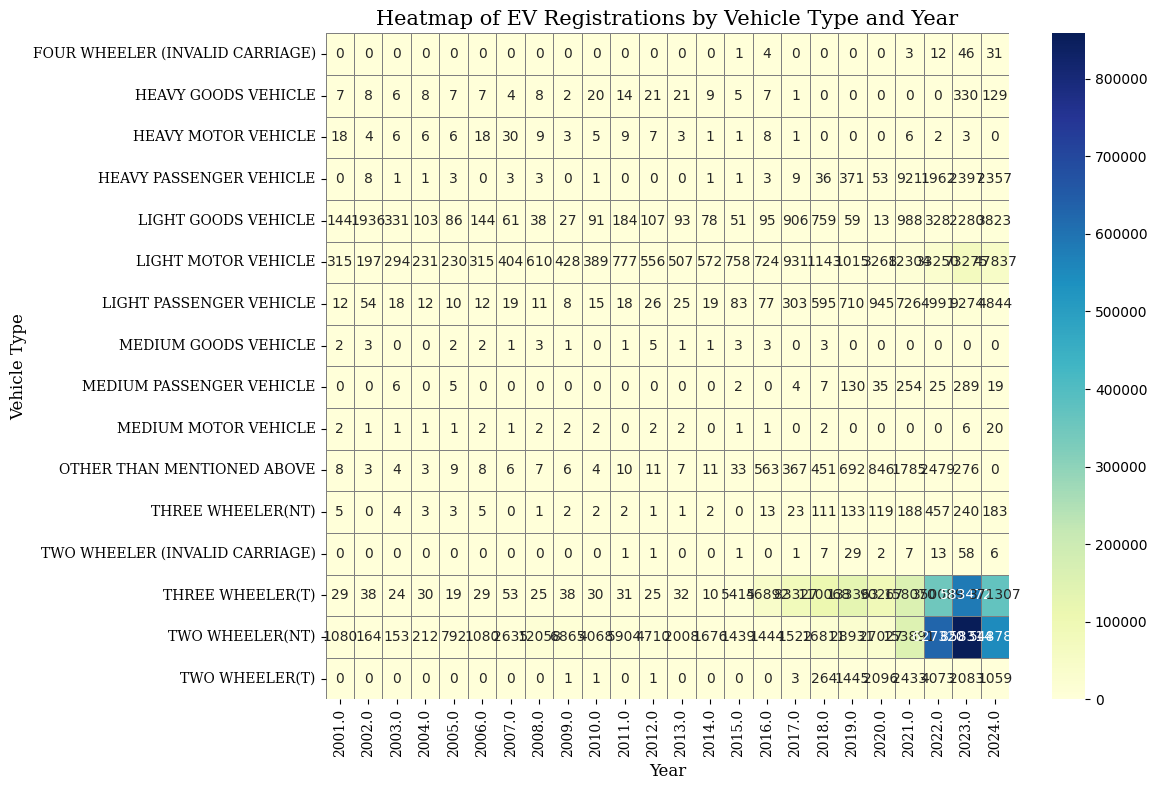

In [39]:
df5['Date'] = pd.to_datetime(df5['Date'], errors='coerce')
df5['Year'] = df5['Date'].dt.year

# Group by year and sum vehicle category columns
vehicle_type_yearly = df5.groupby('Year').sum(numeric_only=True).transpose()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(vehicle_type_yearly, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of EV Registrations by Vehicle Type and Year', fontsize=15, family='serif')
plt.xlabel('Year', fontsize=12, family='serif')
plt.ylabel('Vehicle Type', fontsize=12, family='serif')
plt.xticks(fontsize=10, family='serif')
plt.yticks(fontsize=10, family='serif')
plt.tight_layout()
plt.show()

# **Model Building Using K-Means**

In [42]:
df5['Date'] = pd.to_datetime(df5['Date'], errors='coerce')
df5['YearMonth'] = df5['Date'].dt.to_period('M')

# Group by time and vehicle category
df_grouped = df5.groupby('YearMonth').sum(numeric_only=True)

# Optional: Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_grouped)

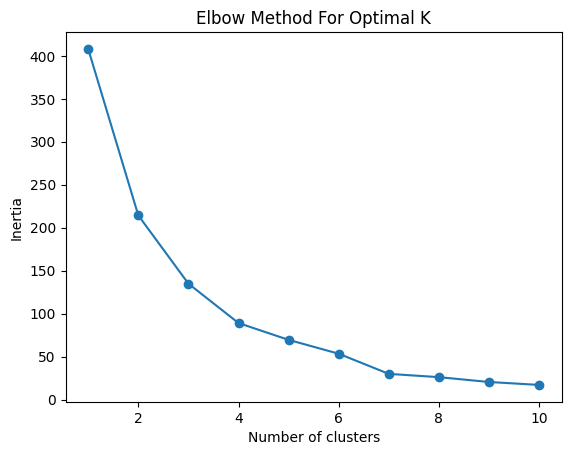

In [43]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [44]:
# Let's say optimal K found was 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster label to original grouped data
df_grouped['Cluster'] = clusters

<ipython-input-46-0c2ec925e294>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans.fit_predict(scaled_data)


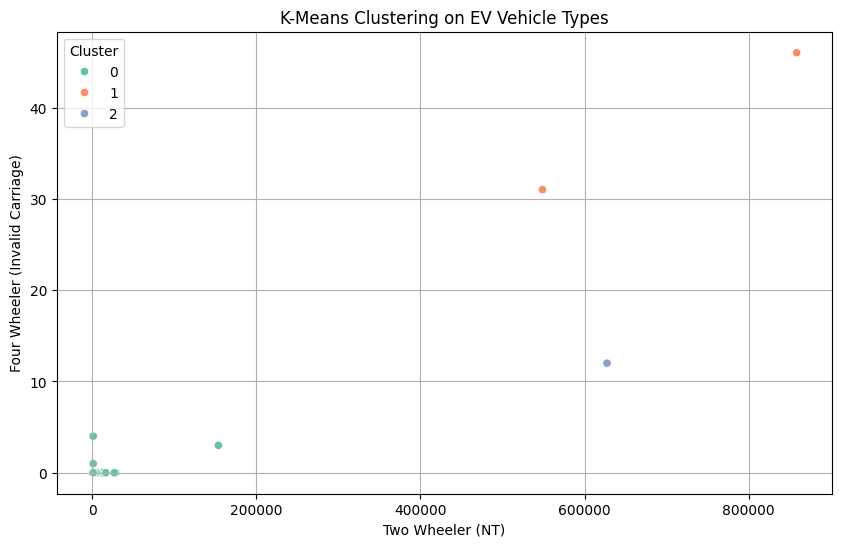

In [46]:
# Convert 'Date' column to datetime and extract Year-Month
df5['Date'] = pd.to_datetime(df5['Date'], errors='coerce')
df5['YearMonth'] = df5['Date'].dt.to_period('M')

# Group by YearMonth and sum values
df_grouped = df5.groupby('YearMonth').sum(numeric_only=True)

# Select specific vehicle type columns for clustering
features = ['TWO WHEELER(NT)', 'FOUR WHEELER (INVALID CARRIAGE)']
df_selected = df_grouped[features]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_selected,
    x='TWO WHEELER(NT)',
    y='FOUR WHEELER (INVALID CARRIAGE)',
    hue='Cluster',
    palette='Set2'
)
plt.title('K-Means Clustering on EV Vehicle Types')
plt.xlabel('Two Wheeler (NT)')
plt.ylabel('Four Wheeler (Invalid Carriage)')
plt.grid(True)
plt.show()